In [23]:
# Execute from parent directory.
import sys
sys.path.append('../')

import numpy as np
import sympy
sympy.init_printing()

import models
import utilities

# Models
`models.stochastic.StochasticModel` is a class that defines any nonlinear dynamical model influenced by stochastic noise parameters. For convenience, a number of functions in models.parasitism exist to make some simple models, including a test AR1 autoregressive model, `ar1()`; Nicholson-Bailey, `nb()`; Nicholson-Bailey with negative binomial functional response, `nbd()`; and a helper function for creating multi-patch models with constant, symmetric linear dispersal between patches, `get_model(modelstr)`. 

In [38]:
model = models.parasitism.get_model("nbd(2)") # Get a two-patch NBD model.
print model

<models.stochastic.StochasticModel instance at 0x10ac738c0>


`models.stochastic.StochasticModel` contains a number of methods for solving for equilibria, deriving the linearized model, etc. For convenience, `models.parasitism.get_model` automatically solves for the equilibrium and linearization, so you can access them through their respective member variables.

### Member variables

<class 'sympy.matrices.dense.MutableDenseMatrix'>


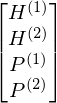

In [39]:
print type(model.vars)
model.vars # deterministic variables (host, parasitoid for each patch.)

<class 'sympy.matrices.dense.MutableDenseMatrix'>


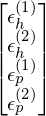

In [40]:
print type(model.noises)
model.noises # stochastic variables

<class 'sympy.matrices.dense.MutableDenseMatrix'>


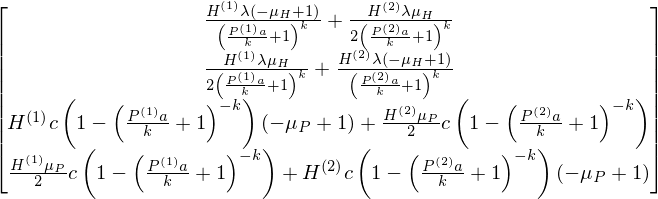

In [41]:
print type(model.deterministic)
model.deterministic # deterministic terms of the equation

<class 'sympy.matrices.dense.MutableDenseMatrix'>


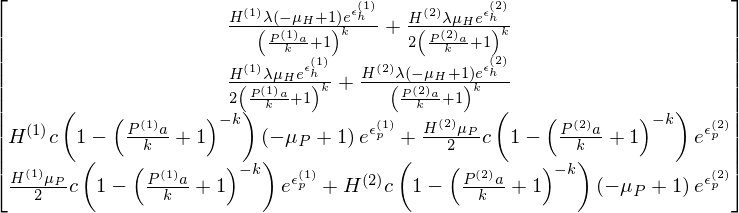

In [42]:
print type(model.stochastic)
model.stochastic # stochastic terms of the equation

<type 'dict'>


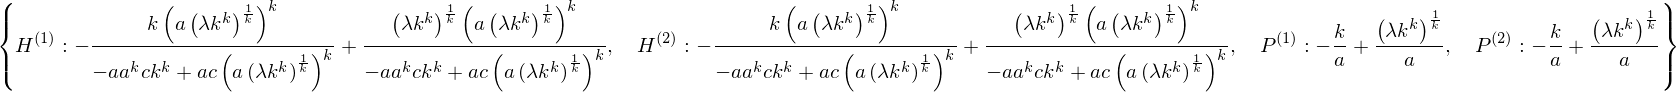

In [43]:
print type(model.equilibrium)
model.equilibrium

<class 'sympy.matrices.dense.MutableDenseMatrix'>


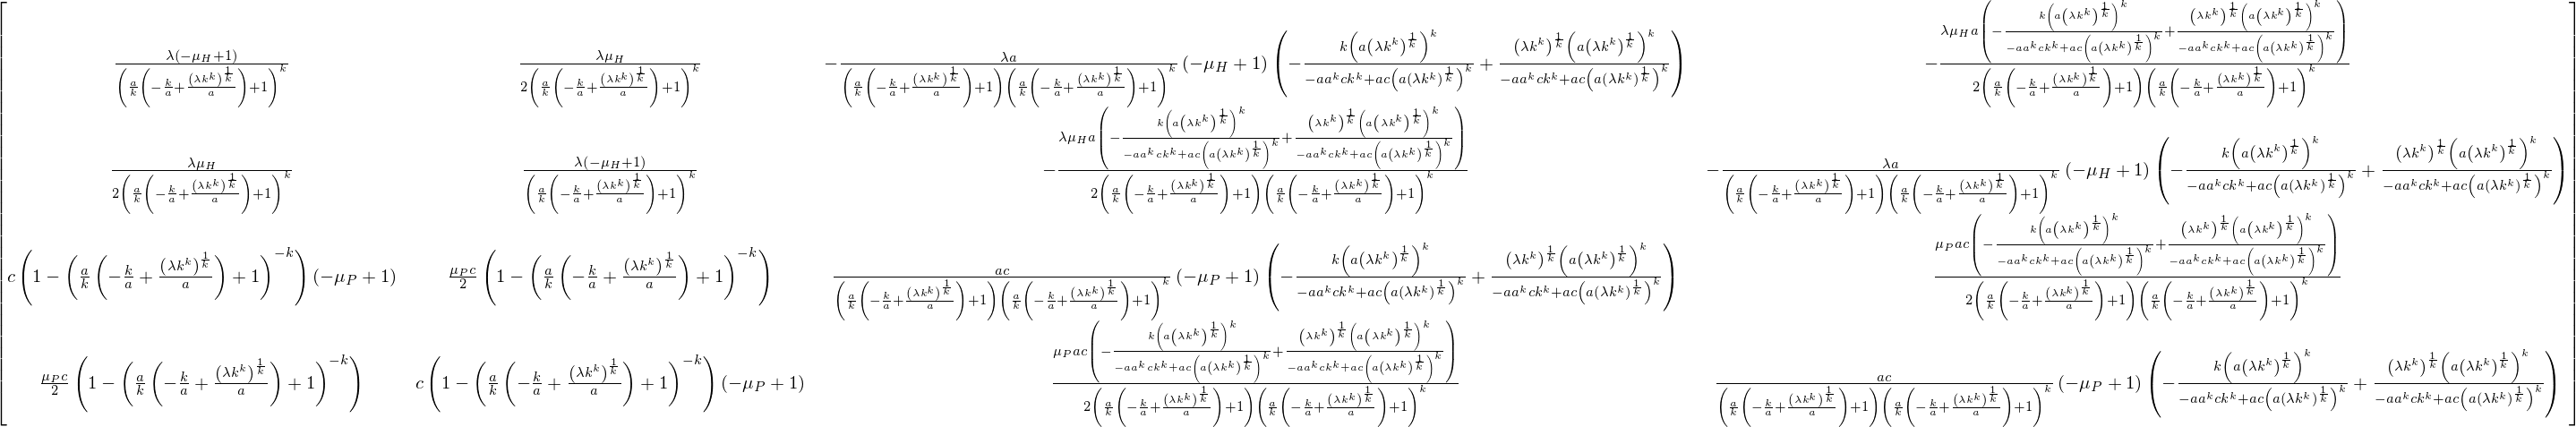

In [36]:
print type(model.A)
model.A # Deterministic Jacobian evaluated at the equilibrium point.

<class 'sympy.matrices.dense.MutableDenseMatrix'>


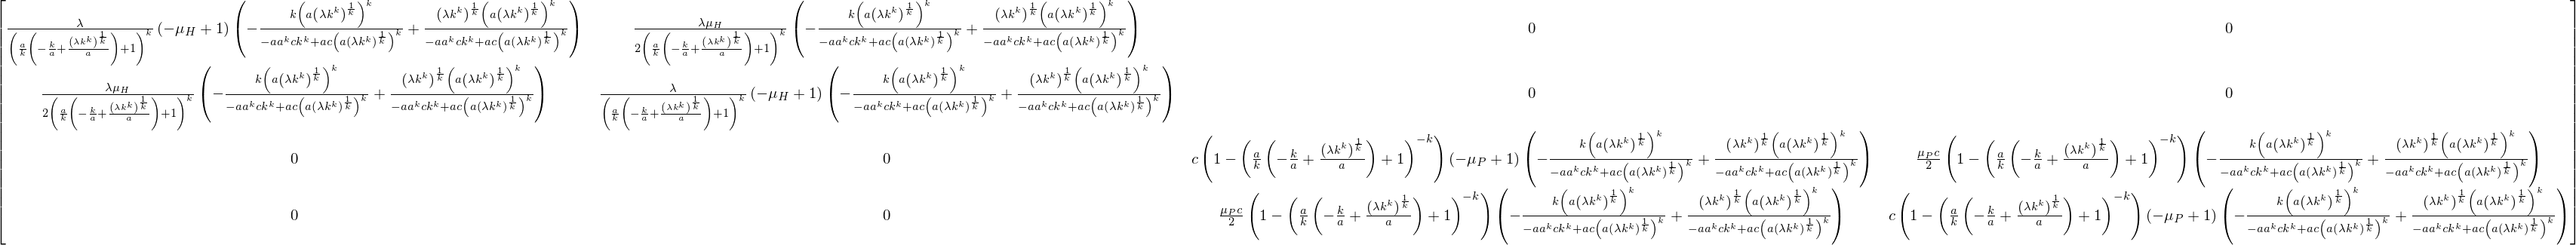

In [37]:
print type(model.B)
model.B # Stochastic Jacobian evaluated at the equilibrium point.

### Methods
`StochasticModel` contains a few methods for calculating covariance, eigenvalues, the spectral matrix, and simulation results.

In [44]:
params = dict(r=2.0, a=1.0, c=1.0, k=0.5, mh=0.25, mp=0.25)
noiseparams = dict(SpSh=1, Chh=0.5, Cpp=0.5)

# Simple helper for making noise covariance matrices.
noise = utilities.noise_cov(noiseparams) 

# Converts text parameter names to sympy symbols.
sym_params = models.parasitism.sym_params(params) 

print type(noise)
print noise
print
print type(sym_params)
print sym_params

<type 'numpy.ndarray'>
[[ 1.   0.5  0.   0. ]
 [ 0.5  1.   0.   0. ]
 [ 0.   0.   1.   0.5]
 [ 0.   0.   0.5  1. ]]

<type 'dict'>
{\mu_P: 0.25, a: 1.0, \mu_H: 0.25, c: 1.0, k: 0.5, \lambda: 2.0}


#### Eigenvalues

In [46]:
evals, evecs = model.calculate_eigenvalues(sym_params)
print type(evals)
print evals
print
print type(evecs)
print evecs

<type 'numpy.ndarray'>
[ 0.6015625+0.46080507j  0.6015625-0.46080507j  0.4296875+0.32914648j
  0.4296875-0.32914648j]

<type 'numpy.ndarray'>
[[ 0.54772256 +0.00000000e+00j  0.54772256 -0.00000000e+00j
  -0.54772256 +0.00000000e+00j -0.54772256 -0.00000000e+00j]
 [ 0.54772256 +6.38378239e-16j  0.54772256 -6.38378239e-16j
   0.54772256 +8.60422844e-16j  0.54772256 -8.60422844e-16j]
 [ 0.22821773 -3.84599359e-01j  0.22821773 +3.84599359e-01j
  -0.22821773 +3.84599359e-01j -0.22821773 -3.84599359e-01j]
 [ 0.22821773 -3.84599359e-01j  0.22821773 +3.84599359e-01j
   0.22821773 -3.84599359e-01j  0.22821773 +3.84599359e-01j]]


##### Covariance

In [47]:
import timeit

start_time = timeit.default_timer()
cov = model.calculate_covariance(sym_params, noise)
elapsed = timeit.default_timer() - start_time

print '%fs' % elapsed
print type(cov)
print cov

0.000611s
<type 'numpy.ndarray'>
[[ 14.60764234  11.85786537   4.09783558   3.65068681]
 [ 11.85786537  14.60764234   3.65068681   4.09783558]
 [  4.09783558   3.65068681   5.94208431   5.12363945]
 [  3.65068681   4.09783558   5.12363945   5.94208431]]


#### Spectral matrix

In [48]:
# Adjust v to change of input frequency at which to evaluate the spectral matrix (0 to 0.5)
spectrum = model.calculate_spectrum(sym_params, noise, v=0)
print type(spectrum)
print spectrum

<type 'numpy.ndarray'>
[[ 23.97826365+0.j  17.98392472+0.j  11.17457108+0.j   9.34842061+0.j]
 [ 17.98392472+0.j  23.97826365+0.j   9.34842061+0.j  11.17457108+0.j]
 [ 11.17457108+0.j   9.34842061+0.j   7.95053105+0.j   6.70874873+0.j]
 [  9.34842061+0.j  11.17457108+0.j   6.70874873+0.j   7.95053105+0.j]]


#### Simulation
See `test_cospectrum.py` and `test_covariance.py` for some examples of how to simulate population trajectories.